## Steps for fitting continuous probability distributions to raw data and estimating the distribution's parameters

* BDA 612: Management Analytics (Spring 2023)
* Prepared by Ehsan Ahmadi


Run the following command if `fitter` library is not installed.

In [1]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25609 sha256=5cd756422b09040398328bbbfb14424f2286b7d15987132d3adb3f0f0fa7d2d8
  Stored in directory: /root/.cache/pip/wheels/8e/6b/cb/628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built fitter


### 1. Loading Libraries
The first step is to install and load different libraries.

`NumPy`: random normal number generation<br>
`Pandas`: data loading<br>
`Seaborn`: histogram plotting<br>
`Fitter`: for identifying the best distribution<br>

From the Fitter library, you need to load Fitter, `get_common_distributions` and `get_distributions` class.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

### 2. Loading Dataset
Read the data using pandas `pd.read_csv()` function and see the first five observations.

In [3]:
dataset = pd.read_excel("/content/JaamSimData.xlsx")
dataset.head()

,IAT,Service_Time_Order,Selfservetime,Dine_In_Time,Table1,Table2,Table3,Table4,Table5,Table6
0,11,7,12,36,30,47,19,58,66,47
1,9,6,22,57,68,59,51,71,9,11
2,4,9,16,32,39,19,68,33,46,49
3,5,7,28,21,47,18,30,17,31,72
4,4,10,30,30,50,17,30,44,29,20


### 3. Plotting Histogram
The first task is to plot the distribution using a histogram to get a preliminary idea of the distribution the data follows.

The `displot()` function from the `seaborn` library is used to plot the histogram. The number of bins provided here is 7.

The plot shows that the service time looks like a normal distribution.

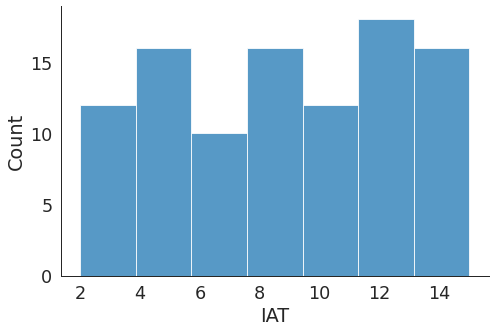

In [18]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="IAT", kind="hist", bins = 7, aspect = 1.5)

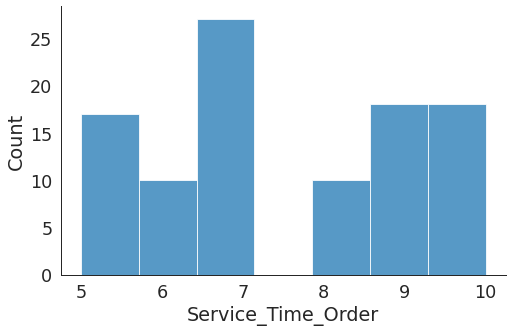

In [19]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Service_Time_Order", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')

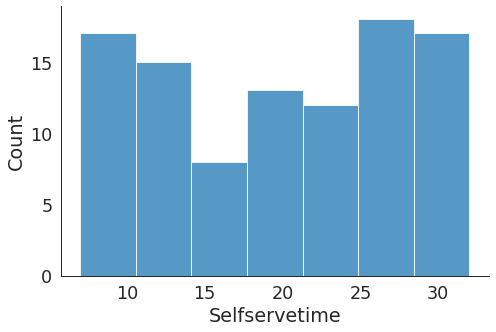

In [20]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Selfservetime", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


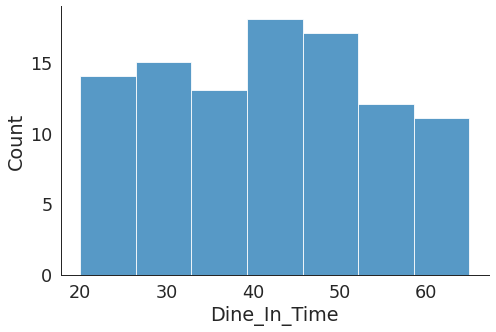

In [21]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Dine_In_Time", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


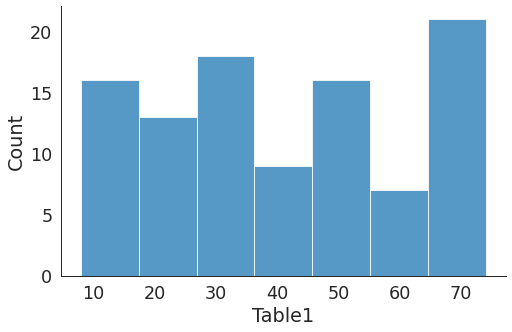

In [22]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Table1", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


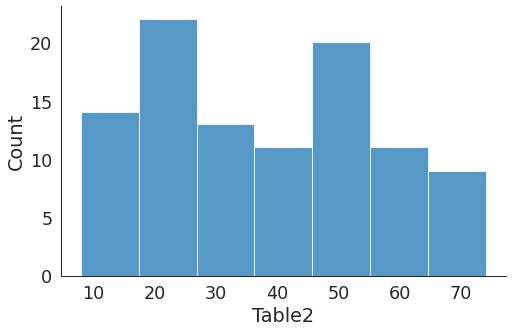

In [23]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Table2", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


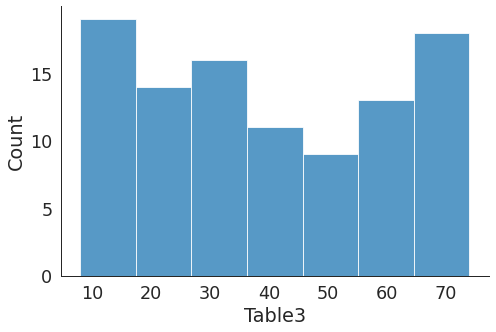

In [24]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Table3", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


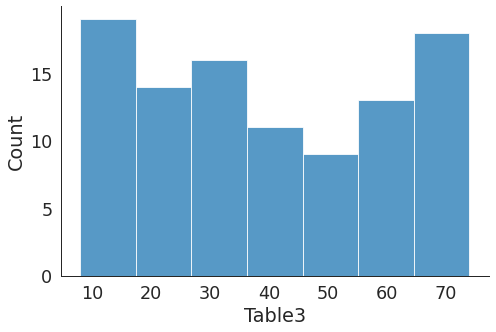

In [25]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Table3", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


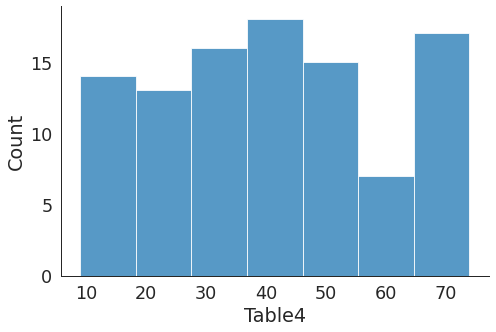

In [26]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Table4", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


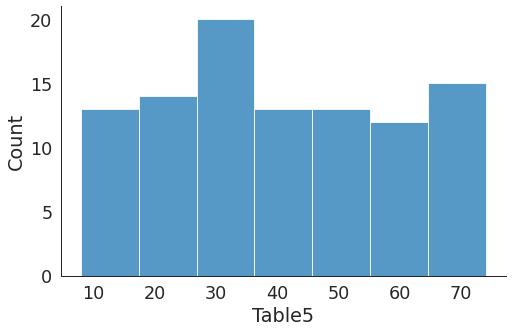

In [27]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Table5", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


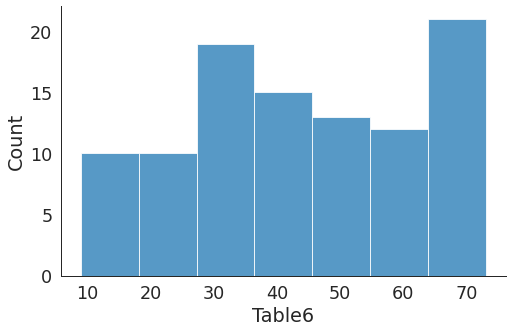

In [28]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Table6", kind="hist", bins = 7, aspect = 1.5)
sns.set_style('white')


### 4. Preparing Data for Fitting Different Distributions
Before suppling the data to Fitter, it should be converted to a NumPy array. One of the best ways to use the `.values` attribute on the "Service Time" column (`dataset["Service Time"]`) and saving it to the data variable.

In [6]:
data_iat = dataset["IAT"].values
data_sevtimeor = dataset["Service_Time_Order"].values
data_slfsrvtim = dataset["Selfservetime"].values
data_dinintim = dataset["Dine_In_Time"].values
data_Tbl1 = dataset["Table1"].values
data_Tbl2 = dataset["Table2"].values
data_Tbl3 = dataset["Table3"].values
data_Tbl4 = dataset["Table4"].values
data_Tbl5 = dataset["Table5"].values
data_Tbl6 = dataset["Table6"].values


### 5. Fitting Distributions

The next step is to start fitting different distributions and finding out the best-suited distribution for the data.

The steps are:

1. Create a Fitter instance by calling the `Fitter()`
2. Supply the data and distributions list if you have a basic idea of the distributions that might fit your data
3. Apply the `.fit()` method
4. Generate the fitted distribution summary using `.summary()` method

**Note:**

If you have no initial idea about the distribution which might fit your data then you can call the `Fitter()` and supply the `Fitter(data)` only.

The Fitter class in the backend uses the Scipy library which supports 80 distributions and the Fitter class will scan all of them, call the fit function for you, ignoring those that fail or run forever and finally give you a summary of the best distributions in the sense of sum of the square errors.

But this might take some time as it will try so many distributions and the fitting time also varies with your sample size. **So, it is recommended to first plot a histogram and get an overall idea about the types of distributions that might fit the data and supply those distribution names in a list using the distributions argument.** This will definitely save you time.

Here, I have fitted *expon*,*norm*, *beta*, *uniform*, and *triang* distributions. Calling the **summary()** method on the fitted object shows the different distributions and fit statistics such as *sumsquare_error* and *Kolmogorov-Smirnov (KS)* goodness-of-fit test. By default, the summary function ranks the best five distributions based on the sumsquare_error values in ascending order. Additionally, it provides an illustration of different distributions fitted over a histogram.

For the list of **continuous** probability distributions see [Continuous Statistical Distributions](https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html)

Based on the *sumsquare_error* value the best distribution for the height data is the beta distribution followed by normal distribution.

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 16.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,3.985620,544.466079,-303.827053,inf,0.076506,0.575233
uniform,4.047337,516.989871,-311.500758,inf,0.122308,0.092188
triang,4.128051,551.502831,-304.920971,inf,0.203288,0.000423
norm,4.166368,554.555257,-308.602214,inf,0.128984,0.065511
expon,4.203127,578.645862,-307.723803,inf,0.202986,0.000434


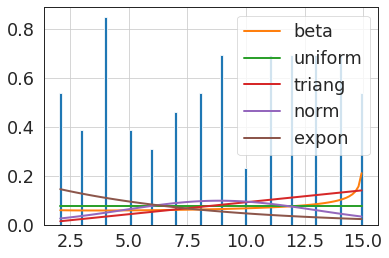

In [8]:
f_servicetime = Fitter(data_iat, distributions=["expon","norm", "beta", "uniform", "triang"])
f_servicetime.fit()
f_servicetime.summary()


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 10.78it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,69.758396,333.500859,-17.592559,inf,0.170000,5.376407e-03
uniform,70.640000,325.887582,-25.547023,inf,0.180000,2.630050e-03
triang,70.959455,353.976025,-20.490642,inf,0.244759,9.243293e-06
expon,71.411362,387.313952,-24.460979,inf,0.272167,4.909529e-07
norm,71.581540,366.276811,-24.222956,inf,0.168726,5.871592e-03


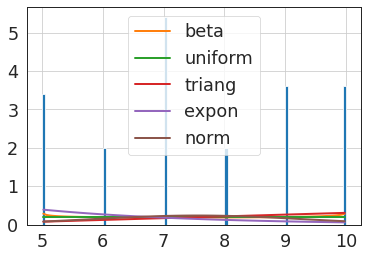

In [9]:
f_dintime =    Fitter(data_sevtimeor, distributions=["expon","norm", "beta", "uniform", "triang"])
f_dintime.fit()
f_dintime.summary()


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 13.41it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.569574,674.566584,-498.383025,inf,0.091042,0.356894
uniform,0.579200,647.775165,-505.917422,inf,0.070000,0.684671
triang,0.592758,675.345501,-498.998337,inf,0.146782,0.024102
norm,0.611872,684.577627,-500.429918,inf,0.100035,0.252339
expon,0.619223,709.217109,-499.235584,inf,0.175438,0.003663


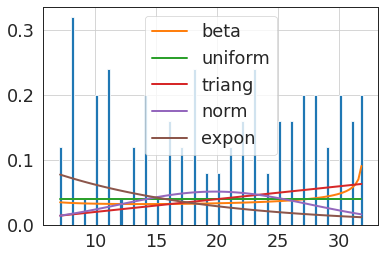

In [10]:
f_iat = Fitter(data_slfsrvtim, distributions=["expon","norm", "beta", "uniform", "triang"])
f_iat.fit()
f_iat.summary()


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 12.90it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.108494,773.307970,-664.202423,inf,0.093090,0.330858
uniform,0.108642,765.332498,-673.276422,inf,0.086667,0.416790
triang,0.111531,793.385337,-666.047191,inf,0.091543,0.350399
norm,0.112273,801.505265,-669.988901,inf,0.080890,0.504066
expon,0.119408,826.908610,-663.827415,inf,0.204715,0.000375


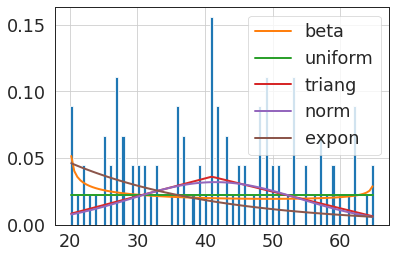

In [11]:
f_iat = Fitter(data_dinintim, distributions=["expon","norm", "beta", "uniform", "triang"])
f_iat.fit()
f_iat.summary()


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 20.10it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.036305,864.037414,-773.675880,inf,0.096649,0.288741
uniform,0.037190,841.930948,-780.477993,inf,0.099091,0.262128
norm,0.041705,878.665633,-769.019557,inf,0.090643,0.362109
triang,0.042105,876.678428,-763.461140,inf,0.246882,0.000007
expon,0.042273,903.309145,-767.667040,inf,0.151617,0.017962


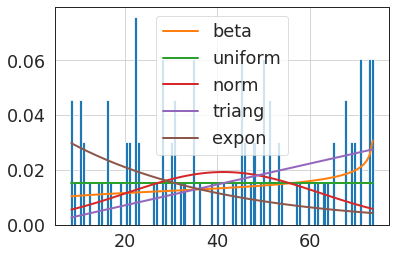

In [12]:
f_iat = Fitter(data_Tbl1, distributions=["expon","norm", "beta", "uniform", "triang"])
f_iat.fit()
f_iat.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 10.70it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.031107,849.467160,-789.129533,inf,0.060947,0.829322
triang,0.031132,870.943117,-793.653610,inf,0.119750,0.104572
uniform,0.031680,841.930948,-796.512258,inf,0.107576,0.183637
norm,0.033494,880.955528,-790.944508,inf,0.120158,0.102511
expon,0.035392,904.392657,-785.433790,inf,0.158834,0.011374


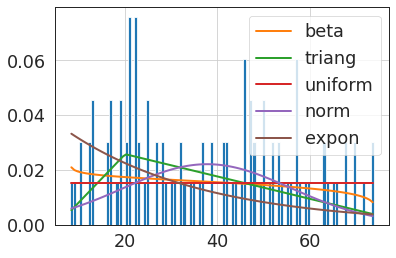

In [13]:
f_iat = Fitter(data_Tbl2, distributions=["expon","norm", "beta", "uniform", "triang"])
f_iat.fit()
f_iat.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 14.71it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.037190,841.930948,-780.477993,inf,0.086667,0.416790
beta,0.038021,872.270620,-769.059112,inf,0.095026,0.307456
triang,0.040749,869.849804,-766.734249,inf,0.182499,0.002185
expon,0.041213,903.401128,-770.207502,inf,0.135563,0.045957
norm,0.041848,878.569331,-768.678324,inf,0.107911,0.180964


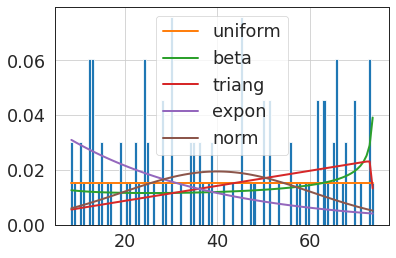

In [14]:
f_iat = Fitter(data_Tbl3, distributions=["expon","norm", "beta", "uniform", "triang"])
f_iat.fit()
f_iat.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 12.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.036030,845.510785,-774.437421,inf,0.106746,0.190400
uniform,0.036450,838.877454,-782.488872,inf,0.068462,0.710470
norm,0.039211,874.219013,-775.187287,inf,0.067822,0.721110
triang,0.039376,866.409244,-770.161087,inf,0.181286,0.002392
expon,0.042746,900.261479,-766.553503,inf,0.177831,0.003082


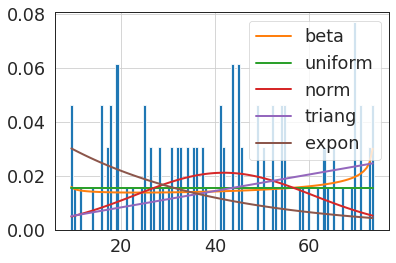

In [15]:
f_iat = Fitter(data_Tbl4, distributions=["expon","norm", "beta", "uniform", "triang"])
f_iat.fit()
f_iat.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 11.62it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.030303,841.930948,-800.957434,inf,0.064848,0.769613
beta,0.030962,859.991404,-789.595206,inf,0.091500,0.350958
norm,0.033288,877.351072,-791.562503,inf,0.088137,0.396023
triang,0.034088,869.488566,-784.581110,inf,0.172993,0.004360
expon,0.035589,903.345168,-784.879434,inf,0.174491,0.003920


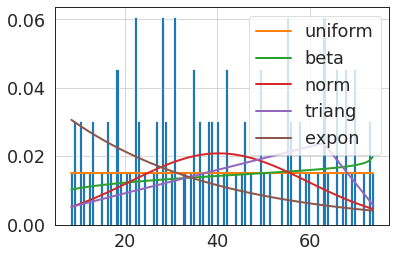

In [16]:
f_iat = Fitter(data_Tbl5, distributions=["expon","norm", "beta", "uniform", "triang"])
f_iat.fit()
f_iat.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 17.20it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.037083,850.681601,-771.556916,inf,0.141710,0.032475
uniform,0.037598,835.776617,-779.388035,inf,0.113750,0.139077
norm,0.039629,873.613754,-774.126872,inf,0.085591,0.432375
triang,0.039664,870.673662,-769.432102,inf,0.207083,0.000307
expon,0.046178,897.845458,-758.830778,inf,0.238281,0.000018


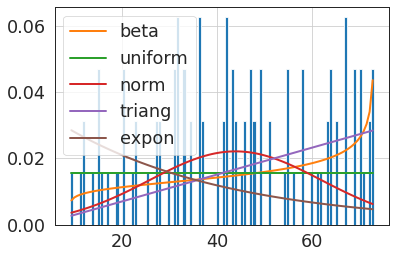

In [17]:
f_iat = Fitter(data_Tbl6, distributions=["expon","norm", "beta", "uniform", "triang"])
f_iat.fit()
f_iat.summary()

There are three main choices for goodness-of-fit tests: 
1. **Kolmogorov-Smirnov (KS)**: can only be applied to *continuous* distributions.
2. **Anderson-Darling (AD)**: can only be applied to *continuous* distributions.
3. **Chi-square good of fit**: can be applied to *discrete* as well as *continuous* distributions.

The null and alternative hypotheses for the goodness-of-fit test are the following:

* **Null:** The sample data follow the hypothesized distribution.<br>
* **Alternative:** The sample data do not follow the hypothesized distribution.

According to the results, the *ks_pvalue* for Beta, Normal, and Triangular distributions are 0.9797, 0.9773, and 0.4709, respectively. Because the *p-value* is greater than the assumed significance level of 0.05, we fail to reject the null hypothesis. For distribution tests, failing to reject the null suggests that the data follow the specified distribution. Therefore, We can conclude that our data follows the Beta, Normal, and Triangular distributions. However, because *p-value* for Beta and Normal distribution is highly greater than that of the Triangular distribution, suggesting stronger evidence that the distribution follows either Normal or Beta.

### 6. Identifying the Parameters
We can print the fitted parameters using the `fitted_param` attribute and indexing it out using the distribution name.

In [ ]:
f_servicetime.fitted_param['norm']

(11.13, 2.5006199231390607)

location parameter (loc) = $310.34$<br>
scale parameter (scale) = $44.91$

In [ ]:
f_servicetime.fitted_param['beta']

(1.2675444667296925, 0.7756286781142357, 6.679644154495621, 8.32035584550438)

shape parameters (a, b) = $[10550.01, 77.27]$<br>
location parameter (loc) = $-53837.69$<br>
scale parameter (scale) = $54544.63$

References: Adapted from [here](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9) and [here](https://fitter.readthedocs.io/en/latest/index.html).
